Results for AAPL:
                           Pivot Point  Support Level 1  Support Level 2  \
Date                                                                       
2024-07-08 00:00:00-04:00       226.31           224.76           221.71   
2024-07-09 00:00:00-04:00       228.15           226.90           225.12   
2024-07-10 00:00:00-04:00       231.77           230.46           227.94   
2024-07-11 00:00:00-04:00       228.58           224.76           221.96   
2024-07-12 00:00:00-04:00       230.62           228.60           226.66   
2024-07-15 00:00:00-04:00       234.91           232.58           230.77   
2024-07-16 00:00:00-04:00       234.47           232.68           230.53   
2024-07-17 00:00:00-04:00       228.99           226.53           224.17   
2024-07-18 00:00:00-04:00       225.63           220.82           217.46   
2024-07-19 00:00:00-04:00       224.80           222.79           221.28   
2024-07-22 00:00:00-04:00       224.94           222.11           220.

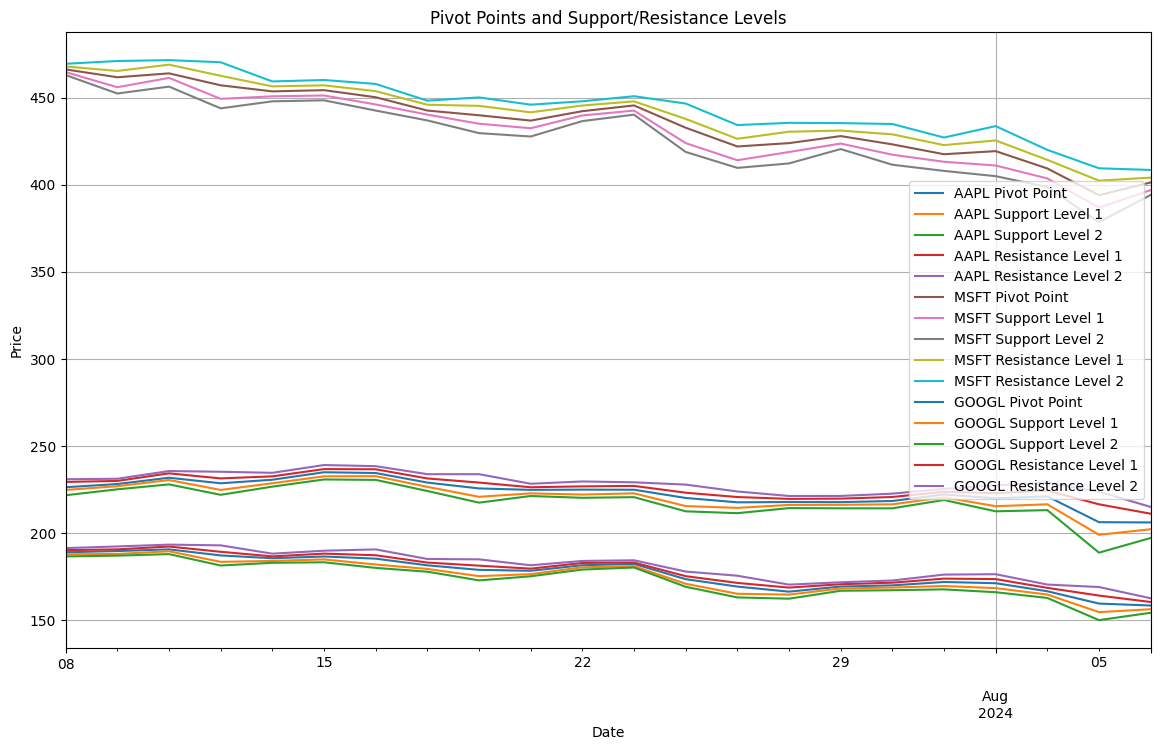

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def calculate_pivot_points(df):
    """Calculate pivot points and support/resistance levels."""
    pivot_points = pd.DataFrame(index=df.index)
    pivot_points['Pivot Point'] = (df['High'] + df['Low'] + df['Close']) / 3
    pivot_points['Support Level 1'] = 2 * pivot_points['Pivot Point'] - df['High']
    pivot_points['Support Level 2'] = pivot_points['Pivot Point'] - (df['High'] - df['Low'])
    pivot_points['Resistance Level 1'] = 2 * pivot_points['Pivot Point'] - df['Low']
    pivot_points['Resistance Level 2'] = pivot_points['Pivot Point'] + (df['High'] - df['Low'])
    return pivot_points.round(2)  # Round to 2 decimal points

def get_stock_data(ticker, period='1mo'):
    """Fetch stock data for a given ticker and period."""
    stock = yf.Ticker(ticker)
    hist = stock.history(period=period)
    return hist

def calculate_for_stocks(tickers, period='1mo'):
    """Calculate pivot points and support/resistance levels for a list of stocks."""
    results = {}
    for ticker in tickers:
        df = get_stock_data(ticker, period)
        pivot_points = calculate_pivot_points(df)
        results[ticker] = pivot_points
    return results

def plot_pivot_points(results):
    """Plot pivot points and support/resistance levels for multiple stocks."""
    plt.figure(figsize=(14, 8))

    for ticker, pivot_points in results.items():
        pivot_points['Pivot Point'].plot(label=f'{ticker} Pivot Point')
        pivot_points['Support Level 1'].plot(label=f'{ticker} Support Level 1')
        pivot_points['Support Level 2'].plot(label=f'{ticker} Support Level 2')
        pivot_points['Resistance Level 1'].plot(label=f'{ticker} Resistance Level 1')
        pivot_points['Resistance Level 2'].plot(label=f'{ticker} Resistance Level 2')

    plt.title('Pivot Points and Support/Resistance Levels')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# List of stock tickers
tickers = ['AAPL', 'MSFT', 'GOOGL']

# Period (e.g., '1mo', '3mo', '1y', etc.)
period = '1mo'

# Calculate pivot points and support/resistance levels
results = calculate_for_stocks(tickers, period)

# Display results
for ticker, pivot_points in results.items():
    print(f"Results for {ticker}:")
    print(pivot_points)
    print()

# Plot the pivot points and support/resistance levels
plot_pivot_points(results)
